All Imports

In [4]:
import random
import time
import requests
from Tools.scripts.win_add2path import modify
from faker import Faker
import matplotlib.pyplot as plt

In [5]:
BASE_URL = "http://localhost:4567"
json_headers = {"Accept": "application/json"}
faker = Faker()
output_dir = "test_metrics/"
session = requests.Session()

In [6]:
def generate_project_data():
    """
    Generate random project data based on the given fields and examples.
    """
    return {
        "title": faker.sentence(nb_words=3),
        "completed": random.choice([True, False]),
        "active": random.choice([True, False]),
        "description": faker.text(max_nb_chars=100)
    }


def generate_todo_data():
    # TODO need to implement
    pass

def generate_category_data():
    # TODO need to implement
    pass

In [7]:
def create_random_projects(num_projects):
    """
    Create a specified number of random projects.
    """
    project_ids = []
    for i in range(num_projects):
        project_id, elapsed_time = create_random_project()
        if project_id != 0:
            project_ids.append(project_id)
        else:
            print(f"Failed to create project {i + 1}/{num_projects}")
    return project_ids

def create_random_project():
    """
    Create a single random project.
    """
    project_id = 0 
    project_data = generate_project_data()  # Assumes this function is defined elsewhere
    start_time = time.time()
    response = session.post(
        f"{BASE_URL}/projects",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code == 201:
        project_id = response.json().get("id", 0)  # Fallback to 0 if "id" is missing
    else:
        print(f"Failed to create project: {response.status_code} - {response.text}")
    return project_id, elapsed_time

def create_random_todos(num_todos):
    # TODO need to implement
    pass
 
def create_random_categories(num_categories):
    # TODO need to implement
    pass

In [8]:
def get_all_projects():
    """
    Fetch all projects and measure the time taken.
    """
    start_time = time.time()
    response = session.get(f"{BASE_URL}/projects", headers=json_headers)
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(f"Failed to fetch projects: {response.status_code} - {response.text}")
    projects = response.json().get('projects', [])
    project_ids = [project.get('id') for project in projects]
    return projects, project_ids, elapsed_time


def get_all_todos():
    return [], [], 0
    # TODO need to implement


def get_all_categories():
    # TODO need to implement
    return [], [], 0


def get_object_count():
    _, project_ids, _ = get_all_projects()
    _, category_ids, _ = get_all_categories()
    _, todo_ids, _ = get_all_todos()
    return len(project_ids) + len(category_ids) + len(todo_ids)

In [9]:
def delete_project(project_id):
    """
    Delete a project ID and measure the time
    """

    start_time = time.time()
    response = session.delete(
        f"{BASE_URL}/projects/{project_id}",
        headers=json_headers
    )

    elapsed_time = time.time() - start_time

    if response.status_code != 200:
        print(f"Failed to delete project{len(project_id)}: {response.status_code} - {response.text}")
    return elapsed_time
            
def delete_projecs(project_ids):
    """
    Delete a projects IDs
    """
    for i in project_ids:
        delete_project(i)
        
def delete_all_projects():
    _, project_ids, _ = get_all_projects()
    delete_projecs(project_ids)

In [10]:
def modify_project(project_id):
    """
    Update a specific project by ID and measure the time taken.
    """
    project_data = generate_project_data() 
    start_time = time.time()
    response = session.put(
        f"{BASE_URL}/projects/{project_id}",
        json=project_data,
        headers=json_headers
    )
    elapsed_time = time.time() - start_time
    if response.status_code != 200:
        print(
            f"Failed to update project ID {project_id}: Time = {elapsed_time:.5f}s, "
            f"Status = {response.status_code}, Error = {response.text}"
        )
    return elapsed_time

In [18]:
delete_all_projects()
step = 1000
steps_num  = 100000//step

create_project_metric = []
delete_project_metric = []
modify_project_metric = []

for i in range(steps_num + 1):
    
    _, _, time_get_projects = get_all_projects()
    project_id, time_create_project = create_random_project()
    time_modify_project = modify_project(project_id)
    time_delete_project = delete_project(project_id)
    
    create_project_metric.append((time_create_project, step * i))
    delete_project_metric.append((time_delete_project, step * i))
    modify_project_metric.append((time_modify_project, step * i))
    
    create_random_projects(step - 1)

In [12]:
def plot_metric(metric, action):
    times = [t[0] for t in metric]
    objects = [t[1] for t in metric]
    
    # Plotting the graph
    plt.figure(figsize=(10, 6))
    plt.plot(objects, times, marker='o', linestyle='-', label='Elapsed Time')
    
    # Adding labels and title
    plt.title(f"Number of objects vs time Ttaken to {action}", fontsize=14)
    plt.xlabel("Number of objects", fontsize=12)
    plt.ylabel("Time taken (seconds)", fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()


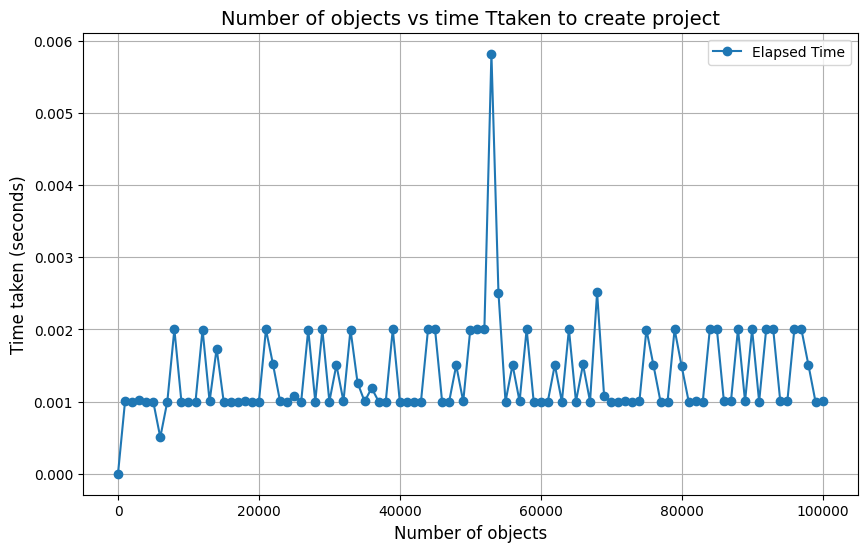

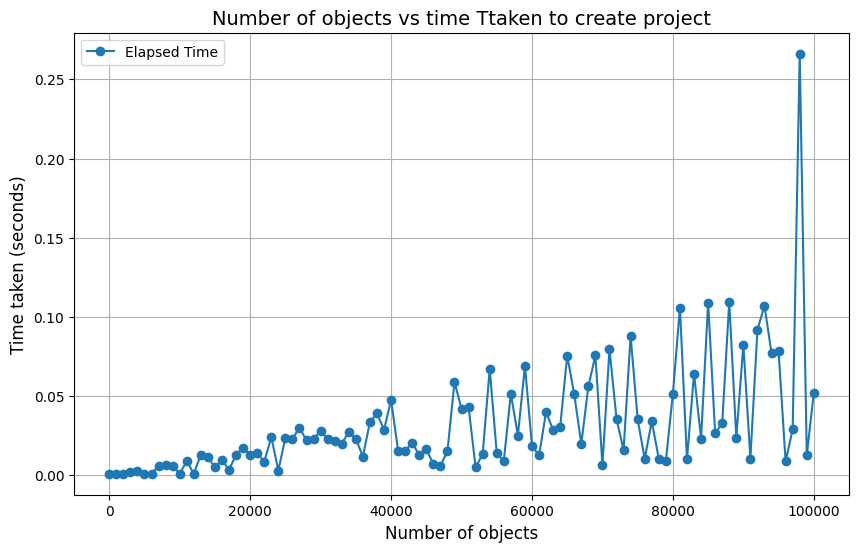

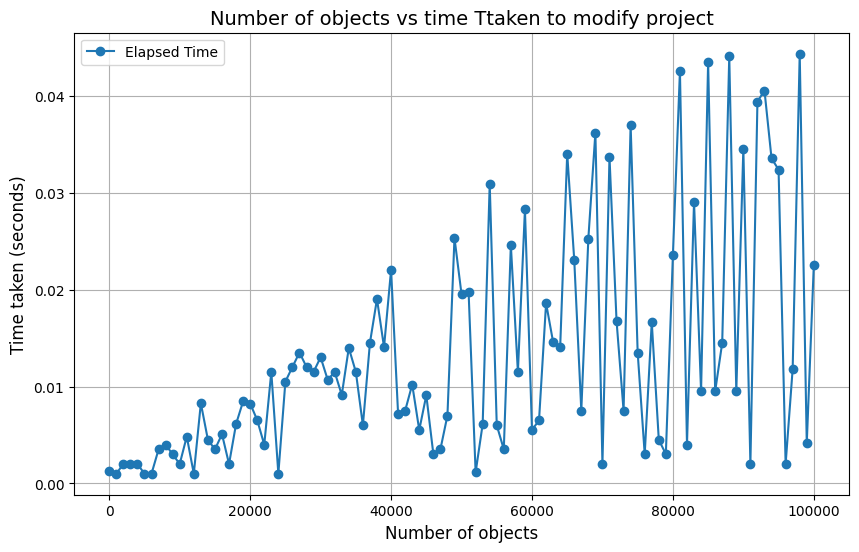

In [19]:
plot_metric(create_project_metric, "create project")
plot_metric(delete_project_metric, "create project")
plot_metric(modify_project_metric, "modify project")